# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Parametros-iniciales" data-toc-modified-id="Parametros-iniciales-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parametros iniciales</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-motor" data-toc-modified-id="Rotación-de-P4---referencia-motor-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Rotación de P4 - referencia motor</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-polarizador" data-toc-modified-id="Rotación-de-P4---referencia-polarizador-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rotación de P4 - referencia polarizador</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final</a></div>

# Experimental calibration

**Author**: Jesús del Hoyo

**Date**:   11/04/2019

**Motivation**: Ecograb project, polariscope callibration

**Objective**:

Este archivo debe servir para realizar una calibración completa del polarimetro. En primer lugar, se calibrarán los elementos en transmisión, introduciéndolos uno a uno. Una vez que el polarímetro esté completamente caracterizado en transmisión, opcionalmente podrán medirse el resto de elementos que se deben colocar en el camino del haz para trabajar en reflexión, como un espejo, un beam splitter o el objetivo de microscopio.

A continuación se describen los elementos de cada parte del polarímetro. Estos elementos pueden cambiar con el tiempo, pero el proceso de calibración es casi el mismo. La única excepción es en caso de que se incluya una fuente con longitud de onda variable. En ese caso, será necesaria una calibración para cada longitud de onda.

**Iluminación**:
1. Diodo láser de Roithner S85500MG de longitud de onda $\lambda$=850 nm.
1. Lente colimadora de Thorlabs DG10-600-B.
1. Polarizador LPNIRE100-B (P0)
1. Retardador WPQ10E-850-SP (R0)

**Brazo de referencia**
1. Beam sampler.
1. Lente ~20 cm de focal.
1. Photodiode PDA100A-EC de Thorlabs (PHD0)

**Generador de estados**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).

**Analizador de estados**
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

**Detector**
1. Dos lentes ~20 cm de focal.
1. Photodiode PDA100A-EC de Thorlabs (PHD1)

**Método de calibración**
La calibración se realiza siempre empezando con el número mínimo de elementos, y añadiéndolos poco a poco para reducir los errores cometidos. Se recomienda dejar calentar la fuente al menos 30 minutos para estabilizarla en temperatura.

1. Medir el nivel de 0 de ambos fotodiodos con el diodo apagado y sin ningún elemento óptico salvo las lentes y el beam splitter.
1. Encender el diodo y colocar P0. Ajustar su ángulo para que se transmita la mayor cantidad de señal posible (se recomienda usar un osciloscopio).
1. Colocar R0 y P2. Se ajusta su ángulo de tal manera que, al hacer un bucle de 360º con P2 se obtenga la menor diferencia entre máximo y mínimo.
1. Retirar P1. En estas condiciones medimos las señales de ambos fotodiodos para tener una medida clara de cuanta energía tenemos sin ningún elemento optico ni del analizador ni del generador de estados, y por supuesto, sin la muestra.
1. Colocar P1 (en la posición de P2) y el polarizador de eje conocido, y rotar P1. De esta manera podremos conocer su ángulo de origen.
1. Retirar el polarizador de eje conocido y colocar R1. Al hacer un bucle en R1 se puede conocer su ángulo de origen.
1. Realizar un doble bucle tanto en R1 como en P2. De esta manera se analiza la fuente de iluminación.
1. Retirar R1 y colocar P3 en la posición de P1.Hacer un bucle en P3.
1. Retirar P1 (que estaba en la posición de P2) y colocar ahí P2. Hacer un bucle en P2.
1. Retirar P3 (que estaba en la posición de P1) y colocar ahí P1. Hacer un bucle en P1.
1. Colocar R1 y hacer un doble bucle con P1 y P2.
1. Colocar R2 y hacer un doble bucle con R1 y R2 manteniendo los polarizadores paralelos.
1. Repetir con los polarizadores cruzados.
1. Análisis de datos. Partimos de una serie de parámetros parecidos a los reales, con ángulos de giro aleatorios, y una fuente de iluminación con elipticidad ligeramente aleatoria. Entonces, se van ajustando todos los experimentos, uno a uno. La bondad del ajuste final se determina por la medida de la matriz de Mueller del vacío, usando los datos del último experimento.
1. Este último paso se repite iterativamente, usando los parámetros finales de una iteración como los parámetros iniciales de la siguiente.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [2]:
import polaripython.calibration 
from polaripython.polarimeter import initialize_motors_and_card, measure_int

SyntaxError: invalid syntax (mueller.py, line 377)

## Parameters

Here we set all the parameters we are going to use for the analysis, including paths and filenames. We store all of them in a dictionary.

In [3]:
cal_dict = {}
# Files
cal_dict["cal_path"] = 'C:\Users\luismiguel\software\polaripython\calibration'
cal_dict["cal_final_path"] = None
cal_dict["cal_name"] = None
# Experiment parameters
cal_dict["type"] = 'Experiment'
cal_dict["N_measures_1D"] = 90
cal_dict["N_measures_2D"] = [14, 15]
cal_dict["max_angle_1D"] = 180*degrees
cal_dict["max_angle_2D"] = 180*degrees
# Fit parameters
cal_dict["NmaxIt"] = 20
cal_dict["tolerance"] = 1e-4
cal_dict["tolerance_fit"] = 1e-4
cal_dict["PlotCadaPaso"] = False
cal_dict["ordenarPes"] = True
cal_dict["ErrorAmpIni"] = 90 * degrees
cal_dict["ErrorAmpFin"] = 0.5 * degrees
cal_dict["ErrorEllipAmpIni"] = 2 * degrees
cal_dict["ErrorEllipAmpFin"] = 0.1 * degrees
cal_dict["tol_while"] = 2.5e-4
cal_dict["N_it_while"] = 10
cal_dict["use_random_angles"] = True
cal_dict["fix_parameters"] = True
cal_dict["save_data"] = True
# Derived parameters
cal_dict["angles_1"] = np.linspace(0,cal_dict["max_angle_1D"],cal_dict["N_measures_1D"])
cal_dict["angles_2X"] = np.linspace(0,cal_dict["max_angle_2D"][0],cal_dict["N_measures_2D"])
cal_dict["angles_2Y"] = np.linspace(0,cal_dict["max_angle_2D"][1],cal_dict["N_measures_2D"])

## Initialization

We start by initializing card and motors.

In [ ]:
cal_dict = initialize_calibration(cal_dict)

## Step 0a: Align detectors

The analyzer arm is usually moved. First, we have to place it so we have the polarimeter in transmission configuration. Then, we must turn on the diode and, after waiting a bit so the intensity is stable over time, the detectors must be placed so the signal is maximum for both of them.

## Step 0b: Photodetector background
 
We have to measure and record the signal measured by the photodetectors with the diode offline. The experiment should be as covered as possible to avoid light from unknown sources. Also, lab lights must be off.

In [12]:
# Apagar diodo
cal_dict['I0'] = measure_int(verbose=True)

-0.0243, 0.0115, 

## Step 1: Align polarizer 0 (P0)

P0 must be placed at the output of the laser diode. The diode shoud emmit linear light, but we use P0 as caution. The alignment is performed manually, so the researcher should do it looking at the osciloscope.

## Step 2: Align retarder 0 (R0)

After placing P0, retarder 0 must be aligned. In order to do that, a polarizer (p1 for example) must be placed in a motor (for example, Motor 3). The idea is that R0 will be aligned when, making a loop with P1, the diference between maximum and minimum must be as close to zero as possible. In order to help with the alignment, the function *step_2* makes a loop and fits the result to calculate Imin and Imax as accurately as possible.

1.9201, 5.1334, 1.9303, 5.1181, 1.9405, 5.1232, 1.9508, 5.1232, 1.9712, 5.1386, 1.9866, 5.1334, 2.0122, 5.1334, 2.0377, 5.1181, 2.0633, 5.1232, 2.0889, 5.1232, 2.1196, 5.1232, 2.1401, 5.1334, 2.1657, 5.1283, 2.1912, 5.1334, 2.2168, 5.1181, 2.2373, 5.1181, 2.2527, 5.1181, 2.2782, 5.1283, 2.2834, 5.1130, 2.2936, 5.1232, 2.2885, 5.1181, 2.2936, 5.1232, 2.2936, 5.1181, 2.2885, 5.1181, 2.2782, 5.1130, 2.2680, 5.1181, 2.2475, 5.1079, 2.2271, 5.1130, 2.2015, 5.0925, 2.1810, 5.1079, 2.1605, 5.0874, 2.1247, 5.1027, 2.1043, 5.0925, 2.0736, 5.0925, 2.0429, 5.0874, 2.0173, 5.0976, 1.9968, 5.0874, 1.9712, 5.0925, 1.9508, 5.0874, 1.9405, 5.0976, 1.9252, 5.0925, 1.9149, 5.1027, 1.9098, 5.0823, 1.9098, 5.0772, 1.9047, 5.0669, 1.9201, 5.0874, 1.9252, 5.0874, 1.9405, 5.0874, 1.9456, 5.0874, 1.9763, 5.0874, 1.9917, 5.0874, 2.0070, 5.0925, 2.0429, 5.0925, 2.0633, 5.0874, 2.0889, 5.0823, 2.1145, 5.0925, 2.1401, 5.0874, 2.1657, 5.0925, 2.1912, 5.0925, 2.2117, 5.0925, 2.2322, 5.0925, 2.2475, 5.0925, 2.2629, 

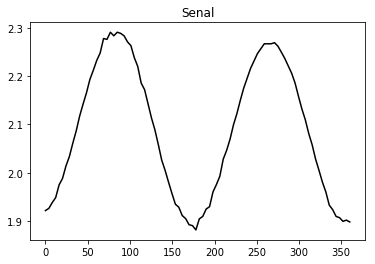

In [34]:
# Parameters
num_data = 60      # Number of points. More points means higher accuracy, but also longer time to make the measurement
max_angle = 180    # Maximum angle we turn the polarizer
motor_num = 3      # Motor with the polarizer

make_step_2(num_data, max_angle, motor_num)

## Step 3: Photodiodes linearity

We should check that the photodiode response is linear. Ideally, we would do it changing the diode current so we linearly vary the illumination intensity. Then, measuring the photodiode response, we would be able to measure this parameter plotting the curve. However, right now the diode emission is only stable after few minutes of waiting, and there is no proof that its emission after stabilization is linear respect to current intensity.

In older calibrations, it was checked that the photodetectors are linear at least up to 5 V. We should check that we are not measuring obove that value.

In [28]:
# Just for the posterity, record set current and voltage (in mA and V respectively)
cal_dict["current"] = 270
cal_dict["voltage"] = 2.26
I = measure_int()
print('The measured intensities are:')
print('  - Measurement channel   : {} V.'.format(I[0]))
print('  - Reference channel     : {} V.'.format(I[1]))

0.0933, 0.1240, 0.0933, 0.1240, 0.0882, 0.1240, 0.0933, 0.1292, 0.0933, 0.1240, 0.0933, 0.1240, 0.0985, 0.1292, 0.0985, 0.1292, 0.0985, 0.1292, 0.0985, 0.1292, 
The mean values are: P1 = 0.0948768675793; P2 = 0.126601315336; Ratio = 0.749414548556
The errors are: E1 = 0.00327638032826; E2 = 0.00255842320621


## Step 4: Photodetector stability

We will measure the average intensity of signal and reference channels over time. With it, we can calculate averages and later we will be able to correct the small deviations and reduce errors.

In [13]:
Nmeasurements = 240    # Number of measurements
Twait = 1              # Waiting time between measurements in seconds
cal_dict['mean_ref'], cal_dict['error_rel_I'] = make_step_4(Nmeasurements, Twait)

4.3659, 4.8674, 4.3403, 4.8674, 4.3352, 4.8674, 4.3403, 4.8674, 4.3352, 4.8674, 4.3301, 4.8622, 4.3352, 4.8725, 4.3352, 4.8674, 4.3352, 4.8622, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8725, 4.3352, 4.8674, 4.3403, 4.8725, 4.3352, 4.8674, 4.3403, 4.8725, 4.3352, 4.8725, 4.3352, 4.8674, 4.3352, 4.8674, 4.3301, 4.8674, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8622, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8622, 4.3352, 4.8827, 4.3352, 4.8981, 4.3352, 4.8981, 4.3301, 4.8981, 4.3352, 4.8929, 4.3352, 4.8878, 4.3403, 4.8929, 4.3352, 4.8981, 4.3403, 4.8929, 4.3352, 4.8929, 4.3352, 4.8929, 4.3301, 4.8929, 4.3352, 4.8878, 4.3352, 4.8929, 4.3352, 4.8878, 4.3352, 4.8878, 4.3301, 4.8878, 4.3352, 4.8878, 4.3352, 4.8827, 4.3352, 4.8827, 4.3403, 4.8827, 4.3403, 4.8776, 4.3403, 4.8776, 4.3403, 4.8827, 4.3352, 4.8827, 4.3403, 4.8776, 4.3403, 4.8827, 4.3403, 4.8827, 4.3403, 4.8776, 4.3403, 4.8827, 4.3403, 4.8776, 4.3352, 4.8827, 4.3403, 4.8827, 4.3403, 

## Step 5: Determination of the origin of angles

In this step we perform the Malus Law with P1 (placed in motor 3) and a polarizer with known optical axes. It is supposed that those angles are aligned with the X and Y axes of the lab, but previous calibrations shows a discrepancy pof ~27º. 

1.3214, 4.8929, 1.4033, 4.8929, 1.4749, 4.8981, 1.5516, 4.8981, 1.6233, 4.9032, 1.6949, 4.9032, 1.7666, 4.8981, 1.8382, 4.8981, 1.8996, 4.8981, 1.9661, 4.8981, 2.0224, 4.8981, 2.0838, 4.8981, 2.1350, 4.9032, 2.1861, 4.8981, 2.2271, 4.8981, 2.2680, 4.9032, 2.3038, 4.8981, 2.3345, 4.8981, 2.3601, 4.8981, 2.3806, 4.9032, 2.3959, 4.8981, 2.4062, 4.8981, 2.4113, 4.8981, 2.4113, 4.8929, 2.4062, 4.8929, 2.3959, 4.9032, 2.3755, 4.8981, 2.3550, 4.9032, 2.3294, 4.8981, 2.2987, 4.8981, 2.2680, 4.8981, 2.2271, 4.8981, 2.1810, 4.8981, 2.1350, 4.8981, 2.0838, 4.9032, 2.0275, 4.8981, 1.9661, 4.8981, 1.9047, 4.8981, 1.8382, 4.8929, 1.7717, 4.8981, 1.7051, 4.8981, 1.6335, 4.8981, 1.5619, 4.9032, 1.4851, 4.8929, 1.4135, 4.8981, 1.3367, 4.9032, 1.2600, 4.8981, 1.1883, 4.8981, 1.1116, 4.9032, 1.0400, 4.8981, 0.9632, 4.8981, 0.9018, 4.8981, 0.8302, 4.9032, 0.7688, 4.8981, 0.7022, 4.8981, 0.6460, 4.8981, 0.5897, 4.8929, 0.5436, 4.8981, 0.4925, 4.8981, 0.4515, 4.8981, 0.4055, 4.8674, 0.3748, 4.8981, 0.3492, 

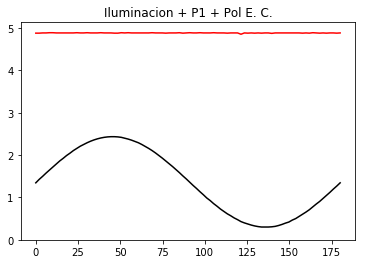

In [15]:
cal_dict["I_step_5"], cal_dict["th0_p1b_test"], cal_dict['Ifuente_test'] = make_step_5(cal_dict)

## Step 6: Origin angle of R2

Now we will place R2 in Motor 2 and will remove the polarizer of known axes. With P1 (which was placed in Motor 3) rotating and R2 still, we will have a pseudo-Malus Law result (because illumination is close to circular). This will allow us measure the origin angle of R2.

3.9566, 4.9032, 3.9975, 4.9083, 4.0333, 4.9032, 4.0487, 4.8929, 4.0589, 4.9032, 4.0538, 4.9032, 4.0333, 4.9083, 4.0077, 4.9083, 3.9719, 4.9083, 3.9156, 4.9032, 3.8645, 4.9032, 3.7928, 4.8981, 3.7212, 4.8981, 3.6291, 4.9083, 3.5370, 4.9032, 3.4295, 4.9032, 3.3272, 4.8981, 3.2146, 4.9032, 3.0918, 4.9083, 2.9690, 4.8981, 2.8462, 4.8929, 2.7234, 4.8981, 2.5852, 4.9032, 2.4573, 4.9032, 2.3243, 4.8981, 2.1912, 4.9032, 2.0531, 4.9032, 1.9201, 4.8981, 1.7921, 4.9032, 1.6591, 4.9134, 1.5363, 4.8981, 1.3981, 4.8981, 1.2805, 4.9083, 1.1628, 4.9083, 1.0451, 4.9032, 0.9325, 4.9032, 0.8302, 4.9032, 0.7278, 4.9032, 0.6357, 4.9083, 0.5487, 4.9083, 0.4669, 4.9032, 0.3799, 4.9032, 0.3134, 4.9083, 0.2520, 4.9032, 0.2008, 4.9032, 0.1496, 4.9032, 0.1087, 4.9032, 0.0678, 4.9032, 0.0524, 4.9083, 0.0319, 4.9083, 0.0268, 4.8981, 0.0319, 4.8981, 0.0422, 4.9032, 0.0575, 4.9083, 0.0882, 4.9032, 0.1240, 4.9032, 0.1752, 4.9083, 0.2315, 4.9032, 0.2929, 4.8981, 0.3645, 4.9032, 0.4566, 4.9134, 0.5436, 4.9032, 0.6460, 

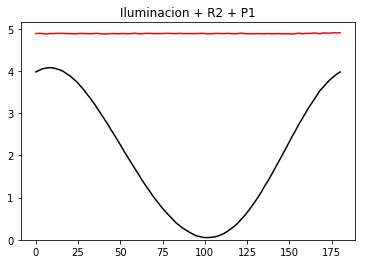

In [16]:
cal_dict["I_step_6"], cal_dict["tho_r2b_test"] = make_step_6(cal_dict)

## Step 7: Analyze the light source

Now that we know the angles of P1 and R2, we have a Stokes state analyzer, and we can use it to analyze the light source.



3.9617, 4.9185, 3.4653, 4.9236, 2.6415, 4.9032, 1.7000, 4.9083, 0.8404, 4.8981, 0.2622, 4.9083, 0.0985, 4.9236, 0.3799, 4.9288, 1.0451, 4.9185, 1.9456, 4.9032, 2.8769, 4.9134, 3.6291, 4.9083, 4.0180, 4.9083, 3.9566, 4.9032, 

4.0282, 4.9185, 3.9566, 4.9185, 3.4602, 4.9134, 2.6415, 4.9185, 1.6898, 4.9134, 0.8353, 4.9083, 0.2571, 4.9236, 0.0831, 4.9185, 0.3645, 4.9185, 1.0348, 4.9134, 1.9405, 4.9185, 2.8820, 4.9236, 3.6342, 4.9288, 4.0282, 4.9083, 

3.6547, 4.8827, 4.0333, 4.9083, 3.9566, 4.9083, 3.4346, 4.9032, 2.6057, 4.9083, 1.6642, 4.9134, 0.7995, 4.9083, 0.2264, 4.9134, 0.0626, 4.9032, 0.3645, 4.9032, 1.0451, 4.9185, 1.9661, 4.9032, 2.9025, 4.8981, 3.6547, 4.8827, 

2.9639, 4.8827, 3.6803, 4.8827, 4.0333, 4.8776, 3.9207, 4.8827, 3.3835, 4.8776, 2.5494, 4.8776, 1.5926, 4.8827, 0.7381, 4.8776, 0.1854, 4.8776, 0.0524, 4.8776, 0.3799, 4.8725, 1.0911, 4.8674, 2.0224, 4.8725, 2.9639, 4.8776, 

2.1350, 4.8929, 3.0560, 4.8776, 3.7519, 4.8827, 4.0589, 4.8878, 3.8952, 4.8827, 3.3118, 4.8827

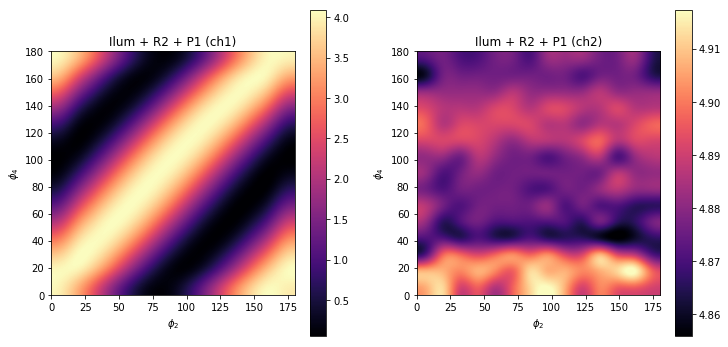

In [17]:
cal_dict["I_step_7"], cal_dict['Ifuente_test'] = make_step_7(cal_dict)

##  Step 8: Calibrate the polarizers

At this step we calibrate the polarizers of the polarimeter. If we assume that both of them can be different (and the probably are, even slightly, due to fabrication tolerances) we need to use three different ones. We will perform the Malus Law experiment with three sets of two polarizers, using each one twice. In this way, we will be able to measure p1 and p2 for the three of them.

Sadly, there are two parameters that we can't measure about the polarizers. The first one is the retardance they introduce. As the intensity of the low transmission state is almost negligible, it shouldn't impact much on latter experiments, but we will see that it is a fine tuning that allows improving precission. It will be measured in the next step. The second parameter we can't measure is the ellipticity of the polarizers eigenstates. We will have to suppose that they are 0. This is a good assumption due to how the polarizers are made.

#### Step 8a

P3 (motor 0) and P1 (motor 3).

0.2878, 4.8776, 0.3390, 4.8776, 0.3901, 4.8520, 0.4413, 4.8725, 0.5027, 4.8725, 0.5539, 4.8827, 0.6153, 4.8520, 0.6715, 4.8725, 0.7278, 4.8827, 0.7943, 4.8827, 0.8506, 4.8776, 0.9172, 4.8725, 0.9683, 4.8827, 1.0246, 4.8776, 1.0860, 4.8725, 1.1423, 4.8929, 1.1986, 4.8725, 1.2549, 4.8981, 1.3009, 4.8725, 1.3572, 4.8776, 1.4084, 4.8776, 1.4544, 4.8827, 1.5005, 4.8827, 1.5414, 4.8776, 1.5823, 4.8776, 1.6182, 4.8674, 1.6489, 4.8725, 1.6898, 4.8725, 1.7103, 4.8725, 1.7410, 4.8878, 1.7666, 4.8776, 1.7819, 4.8725, 1.8024, 4.8776, 1.8126, 4.8776, 1.8177, 4.8981, 1.8228, 4.8776, 1.8228, 4.8827, 1.8177, 4.8827, 1.8075, 4.8674, 1.7973, 4.8725, 1.7819, 4.8776, 1.7614, 4.8520, 1.7358, 4.8776, 1.7051, 4.8878, 1.6693, 4.8827, 1.6233, 4.8725, 1.5823, 4.8776, 1.5363, 4.8827, 1.4902, 4.8827, 1.4391, 4.8776, 1.3777, 4.8725, 1.3214, 4.8827, 1.2549, 4.8827, 1.1935, 4.8776, 1.1269, 4.8776, 1.0604, 4.8878, 0.9888, 4.8827, 0.9172, 4.8827, 0.8506, 4.8878, 0.7790, 4.8878, 0.7074, 4.8827, 0.6357, 4.8776, 0.5692, 

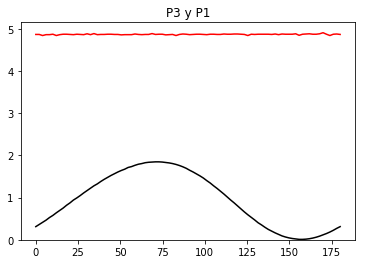

In [18]:
cal_dict["I_step_8a"] = make_step_8a(cal_dict)

#### Step 8b

P3 (motor 0) and P2 (motor 3).

0.2878, 4.8776, 0.3390, 4.8776, 0.3901, 4.8520, 0.4413, 4.8725, 0.5027, 4.8725, 0.5539, 4.8827, 0.6153, 4.8520, 0.6715, 4.8725, 0.7278, 4.8827, 0.7943, 4.8827, 0.8506, 4.8776, 0.9172, 4.8725, 0.9683, 4.8827, 1.0246, 4.8776, 1.0860, 4.8725, 1.1423, 4.8929, 1.1986, 4.8725, 1.2549, 4.8981, 1.3009, 4.8725, 1.3572, 4.8776, 1.4084, 4.8776, 1.4544, 4.8827, 1.5005, 4.8827, 1.5414, 4.8776, 1.5823, 4.8776, 1.6182, 4.8674, 1.6489, 4.8725, 1.6898, 4.8725, 1.7103, 4.8725, 1.7410, 4.8878, 1.7666, 4.8776, 1.7819, 4.8725, 1.8024, 4.8776, 1.8126, 4.8776, 1.8177, 4.8981, 1.8228, 4.8776, 1.8228, 4.8827, 1.8177, 4.8827, 1.8075, 4.8674, 1.7973, 4.8725, 1.7819, 4.8776, 1.7614, 4.8520, 1.7358, 4.8776, 1.7051, 4.8878, 1.6693, 4.8827, 1.6233, 4.8725, 1.5823, 4.8776, 1.5363, 4.8827, 1.4902, 4.8827, 1.4391, 4.8776, 1.3777, 4.8725, 1.3214, 4.8827, 1.2549, 4.8827, 1.1935, 4.8776, 1.1269, 4.8776, 1.0604, 4.8878, 0.9888, 4.8827, 0.9172, 4.8827, 0.8506, 4.8878, 0.7790, 4.8878, 0.7074, 4.8827, 0.6357, 4.8776, 0.5692, 

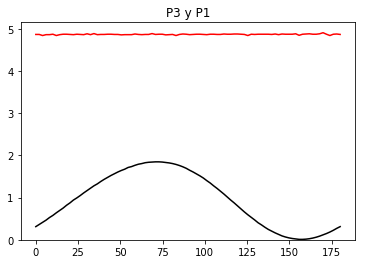

In [18]:
cal_dict["I_step_8b"] = make_step_8b(cal_dict)

#### Step 8c

P1 (motor 0) and P2 (motor 3).

0.2878, 4.8776, 0.3390, 4.8776, 0.3901, 4.8520, 0.4413, 4.8725, 0.5027, 4.8725, 0.5539, 4.8827, 0.6153, 4.8520, 0.6715, 4.8725, 0.7278, 4.8827, 0.7943, 4.8827, 0.8506, 4.8776, 0.9172, 4.8725, 0.9683, 4.8827, 1.0246, 4.8776, 1.0860, 4.8725, 1.1423, 4.8929, 1.1986, 4.8725, 1.2549, 4.8981, 1.3009, 4.8725, 1.3572, 4.8776, 1.4084, 4.8776, 1.4544, 4.8827, 1.5005, 4.8827, 1.5414, 4.8776, 1.5823, 4.8776, 1.6182, 4.8674, 1.6489, 4.8725, 1.6898, 4.8725, 1.7103, 4.8725, 1.7410, 4.8878, 1.7666, 4.8776, 1.7819, 4.8725, 1.8024, 4.8776, 1.8126, 4.8776, 1.8177, 4.8981, 1.8228, 4.8776, 1.8228, 4.8827, 1.8177, 4.8827, 1.8075, 4.8674, 1.7973, 4.8725, 1.7819, 4.8776, 1.7614, 4.8520, 1.7358, 4.8776, 1.7051, 4.8878, 1.6693, 4.8827, 1.6233, 4.8725, 1.5823, 4.8776, 1.5363, 4.8827, 1.4902, 4.8827, 1.4391, 4.8776, 1.3777, 4.8725, 1.3214, 4.8827, 1.2549, 4.8827, 1.1935, 4.8776, 1.1269, 4.8776, 1.0604, 4.8878, 0.9888, 4.8827, 0.9172, 4.8827, 0.8506, 4.8878, 0.7790, 4.8878, 0.7074, 4.8827, 0.6357, 4.8776, 0.5692, 

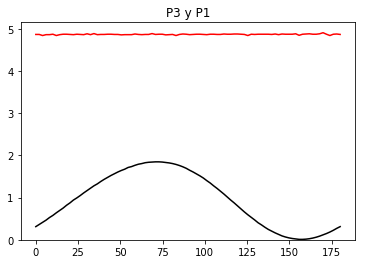

In [18]:
cal_dict["I_step_8c"] = make_step_8a(cal_dict)

#### First analysis of Step 8

Just to check how good are we on the analysis.

In [ ]:
cal_dict["p11"], cal_dict["p12"], cal_dict["th0_p1_test"], cal_dict["Mp2_test"], cal_dict["th0_p2_test"] = analysis_step_8(cal_dict)

## Step 9: Calibration of R2

Now we place R2 in Motor 2 and calibrate it, along with the retardance of P1.



0.6511, 4.8929, 0.5027, 4.8929, 0.4771, 4.8981, 0.5794, 4.8981, 0.7841, 4.8981, 1.0502, 4.8929, 1.3060, 4.8981, 1.5056, 4.8981, 1.5926, 4.8981, 1.5568, 4.8929, 1.3930, 4.8929, 1.1576, 4.8929, 0.8865, 4.8929, 0.6511, 4.8929, 

1.0195, 4.8520, 0.9530, 4.8418, 0.9018, 4.8520, 0.9018, 4.8469, 0.9376, 4.8469, 0.9990, 4.8469, 1.0758, 4.8469, 1.1525, 4.8469, 1.2139, 4.8469, 1.2395, 4.8418, 1.2190, 4.8469, 1.1781, 4.8469, 1.1065, 4.8469, 1.0297, 4.8469, 

1.3879, 4.8418, 1.4186, 4.8469, 1.3726, 4.8469, 1.2600, 4.8520, 1.1065, 4.8520, 0.9427, 4.8520, 0.8148, 4.8520, 0.7432, 4.8520, 0.7534, 4.8520, 0.8353, 4.8418, 0.9734, 4.8418, 1.1372, 4.8622, 1.2856, 4.8622, 1.3930, 4.8725, 

1.6693, 4.8674, 1.8024, 4.8674, 1.7666, 4.8725, 1.5670, 4.8674, 1.2600, 4.8674, 0.9018, 4.8674, 0.5897, 4.8674, 0.3901, 4.8674, 0.3390, 4.8674, 0.4618, 4.8674, 0.7227, 4.8674, 1.0604, 4.8776, 1.4084, 4.8776, 1.6693, 4.8725, 

1.7768, 4.8827, 1.9763, 4.8878, 1.9712, 4.8878, 1.7461, 4.8878, 1.3521, 4.8776, 0.8865, 4.8622

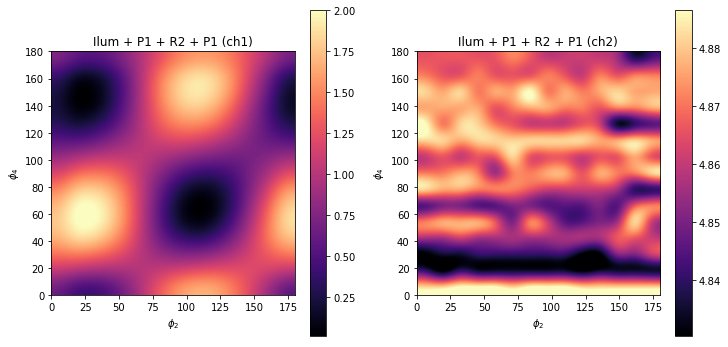

In [21]:
cal_dict["Iexp_Step_9"], cal_dict["Mp1_test"], cal_dict["Mr2_test"] = make_step_9(cal_dict)

## Stet 10: Calibration of retarder 1 and verification

This step is divided into several stages. We start by placing R1 in Motor 1.

#### Step 10a: Calibration of R1

We start by placing P1 and P2 with the axis aligned (not perfectly, because the fits performed so far aren't optimal) and rotate both retarders in order to calibrate R1.



0.7534, 4.8776, 1.0297, 4.8776, 1.4186, 4.8827, 1.5772, 4.8776, 1.3419, 4.8776, 0.8148, 4.8674, 0.3390, 4.8674, 0.2110, 4.8725, 0.4618, 4.8725, 0.8251, 4.8674, 1.0195, 4.8674, 0.9325, 4.8674, 0.7585, 4.8674, 0.7534, 4.8674, 

0.6920, 4.8520, 0.7176, 4.8571, 1.0553, 4.8520, 1.4084, 4.8571, 1.4595, 4.8520, 1.1781, 4.8520, 0.8046, 4.8571, 0.6818, 4.8571, 0.9223, 4.8622, 1.3316, 4.8571, 1.5670, 4.8571, 1.4084, 4.8520, 1.0093, 4.8469, 0.6869, 4.8520, 

0.7074, 4.8674, 0.4822, 4.8674, 0.6715, 4.8725, 1.0809, 4.8725, 1.4033, 4.8725, 1.4544, 4.8725, 1.3163, 4.8725, 1.2446, 4.8776, 1.4084, 4.8776, 1.7205, 4.8776, 1.9047, 4.8827, 1.7307, 4.8929, 1.2344, 4.8929, 0.7074, 4.8878, 

0.6562, 4.8827, 0.2878, 4.8571, 0.3134, 4.8776, 0.6664, 4.8674, 1.1167, 4.8622, 1.4544, 4.8622, 1.6182, 4.8622, 1.6898, 4.8622, 1.8024, 4.8674, 1.9456, 4.8725, 1.9763, 4.8622, 1.7358, 4.8622, 1.2293, 4.8674, 0.6562, 4.8725, 

0.4464, 4.8674, 0.1240, 4.8674, 0.0626, 4.8674, 0.2929, 4.8622, 0.7022, 4.8520, 1.1423, 4.8520

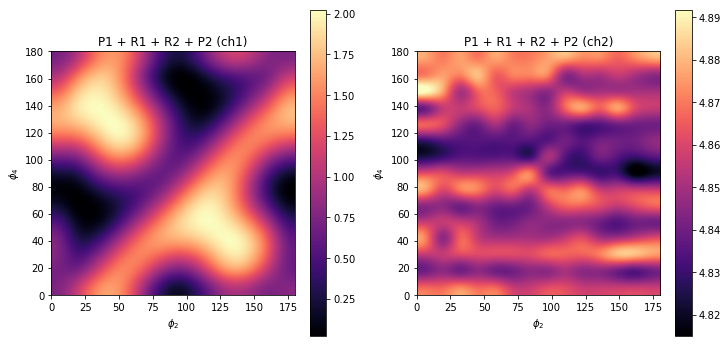

In [23]:
cal_dict["Iexp_Step_10a"], cal_dict["Mr1_test"] = make_step_10a(cal_dict)
cal_dict["M_test"] = [cal_dict["Mp1_test"], cal_dict["Mr1_test"], cal_dict["Mr2_test"], cal_dict["Mp2_test"]]

#### Step 10b: First check (crossed polarizers)

Now, we repeat the previous experiment but with the polarizers crossed. If all other oarameters were measured correctly, the result must be good.



1.2600, 4.8520, 0.9581, 4.8469, 0.5487, 4.8571, 0.3543, 4.8571, 0.5794, 4.8571, 1.1014, 4.8571, 1.5875, 4.8622, 1.7307, 4.8571, 1.5107, 4.8520, 1.1679, 4.8571, 0.9939, 4.8571, 1.0860, 4.8571, 1.2651, 4.8520, 1.2497, 4.8520, 

1.3367, 4.8571, 1.2907, 4.8571, 0.9274, 4.8571, 0.5539, 4.8571, 0.4822, 4.8571, 0.7432, 4.8520, 1.1167, 4.8571, 1.2497, 4.8571, 1.0297, 4.8571, 0.6460, 4.8571, 0.4464, 4.8571, 0.6153, 4.8622, 1.0246, 4.8571, 1.3367, 4.8622, 

1.3214, 4.8674, 1.5414, 4.8674, 1.3367, 4.8725, 0.8967, 4.8725, 0.5487, 4.8674, 0.4822, 4.8674, 0.6050, 4.8725, 0.6818, 4.8674, 0.5334, 4.8674, 0.2315, 4.8674, 0.0678, 4.8674, 0.2673, 4.8622, 0.7892, 4.8622, 1.3214, 4.8622, 

1.3674, 4.8315, 1.7358, 4.8418, 1.7051, 4.8315, 1.3419, 4.8367, 0.8762, 4.8315, 0.5180, 4.8315, 0.3441, 4.8315, 0.2622, 4.8315, 0.1599, 4.8367, 0.0268, 4.8315, 0.0115, 4.8367, 0.2622, 4.8367, 0.7841, 4.8264, 1.3674, 4.8264, 

1.5516, 4.8315, 1.8842, 4.8418, 1.9354, 4.8264, 1.7051, 4.8520, 1.2958, 4.8469, 0.8455, 4.8418

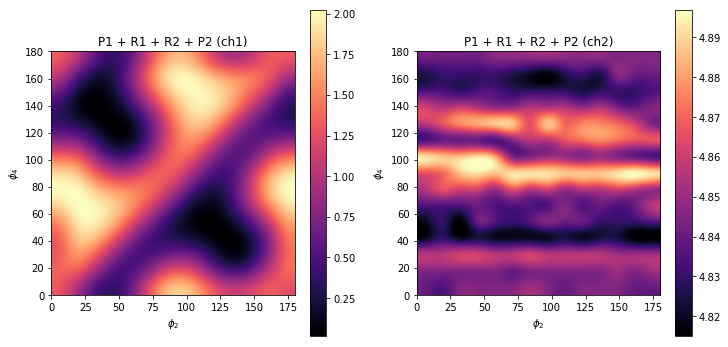

In [24]:
# Hacer el experimento
cal_dict["Iexp_Step_10b"] = make_step_10a(cal_dict)

#### Step 10c: Second check (Mueller matrix of air)

The data measured in the previous stage can be used to determine the Mueller matrix of air (which should be very similar to a 4x4 identity matrix). So let's see what do we obtain.

In [ ]:
cal_dict = make_step_10c(cal_dict)

#### Step 10d: Third check (errors and final reference of angles)

In the last step, we will place the polarizer with known angles as sample for the polarimeter and we will measure it. That will give us a measure of the precission of the polarimeter (as we will be able to compare the result of the fit with this new result), and will give us a final method for knowing the origin angles of our optical elements respect to the lab axes.

In [ ]:
cal_dict['angles_step_10d'], cal_dict['I_step_10d'] = make_step_10d(cal_dict)

## Step 11: Data fit

In the last step, we fit all the experiments performed in the previous steps (from Step 5) in an iterative procedure, so we can obtain the best possible parameters for the optical elements of the polarimeter. It is worth remembering that we are making an hypothesis: the optical elements are pure homogenous diattenuator retarders. This means that we don't measure their depolarization and ellipticity of the eigenstates (both are supposed to be 0).

[Error 2] El sistema no puede encontrar el archivo especificado: u'$med_folder'
C:\Users\luismiguel\software\polarimeter\notebooks\calibration\Medidas_2019-02-07
Carga de datos finalizada
Iteracion 0
Error del ultimo paso: 0.000437816632242.
Iteracion 1
Error del ultimo paso: 0.000437816669214.
Iteracion 2
Error del ultimo paso: 0.000437816666365.
Iteracion 3
Error del ultimo paso: 0.000429776522533.
Iteracion 4
Error del ultimo paso: 0.000429562437588.
Iteracion 5
Error del ultimo paso: 0.000517950242389.
Iteracion 6
Error del ultimo paso: 0.000559129615508.
Iteracion 7
Error del ultimo paso: 0.000595517982472.
Iteracion 8
Error del ultimo paso: 0.00062289517841.
Iteracion 9
Error del ultimo paso: 0.000644008625595.
Iteracion 10
Error del ultimo paso: 0.000646974132046.
Iteracion 11
Error del ultimo paso: 0.000648678839812.
Iteracion 12
Error del ultimo paso: 0.000651032486758.
Iteracion 13
Error del ultimo paso: 0.000653667284842.
Iteracion 14
Error del ultimo paso: 0.000656449637682

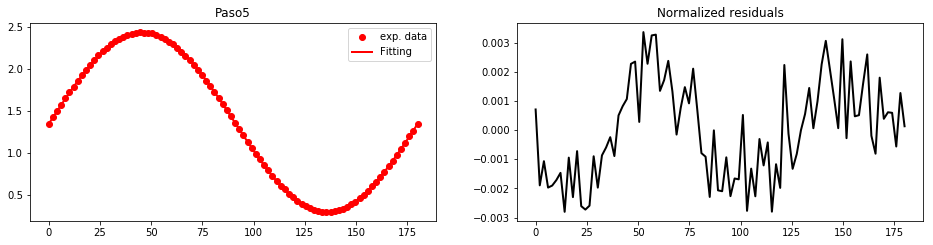

Parametros del paso 6
Th0r2b = 80.986101923 deg; Th0E_az = -1.00623058987 deg; Th0E_el = -0.0335410196046 deg;
Error del paso 6: 0.000542420321603.


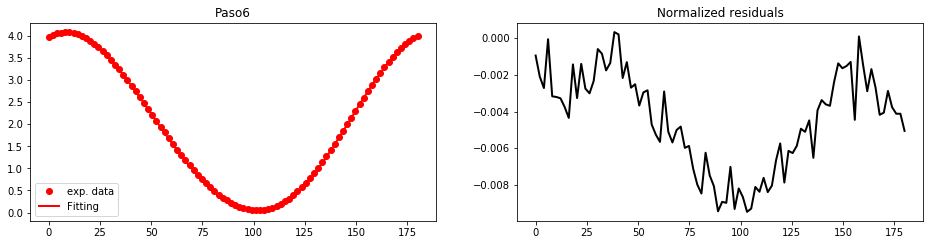

Parametros del paso 7
S0 = 4.28258966001 V; Azimuth = 23.5668146546 deg; Ellipticity = 47.8192903319 deg; Pol. degree = 1.0; Th0_error = -0.155226257954 deg;
Error del paso 7: 0.000507762175847.
Parametros del paso 8
p11 = 0.981060953688; p12 = 0.0514443038342; p21 = 0.975493283775; p22 = 0.048210103394; p31 = 0.979010789534; p32 = 0.0561621811079;
Th0p1 = 173.440233761 deg; Th0p2 = 34.8964450684 deg; Th0p3 = 68.9443590384 deg; Th0E_az = -0.112692682271 deg; Th0E_el = 0.0335410196625 deg;
Error del paso 8: 0.000139250286949.


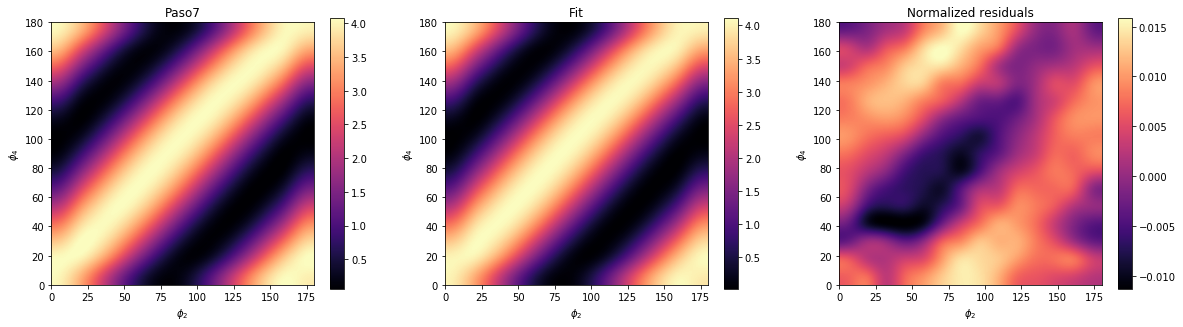

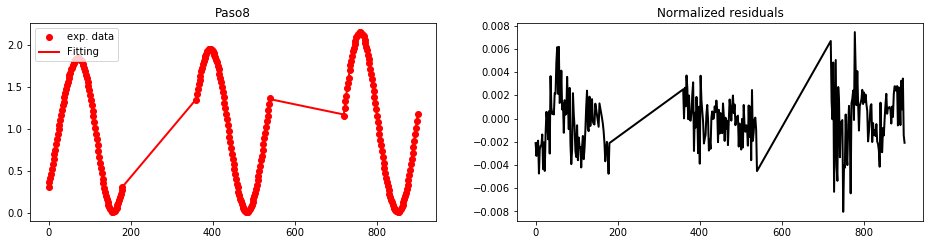

Parametros del paso 9
R2p1 = 0.995476644328; R2p2 = 1.00385811866; Delay_R2 = 82.7605449275; Th0_R2 = 55.4911133638; Delay_p1 = 56.0567412282;
Th0_error = -1.00623058987; Th0E_az = -1.00623058987; Th0E_az = 0.0335410196625;
Error del paso 9: 0.00104260436385.
Parametros del paso 11a
R1p1 = 0.983820656002; R1p2 = 0.988211852408; Delay_R1 = 82.9425129679; Th0_R1 = 162.672244914;
Error del paso 11a: 0.000670157898173.
Error del paso 11b: 0.000708067940237.
La matriz del vacio es:
[[ 0.99873409  0.0003271  -0.00122292  0.        ]
 [-0.0002436   0.98320926 -0.00237347  0.        ]
 [ 0.00124225 -0.00344899  0.98277507  0.        ]
 [-0.          0.          0.          0.99204823]]
Error matriz del vacio: 0.00161074794116.
Error del ultimo paso: 0.000670157898173.
Elapsed time is 721.104999781 s.
Data saved succesfully


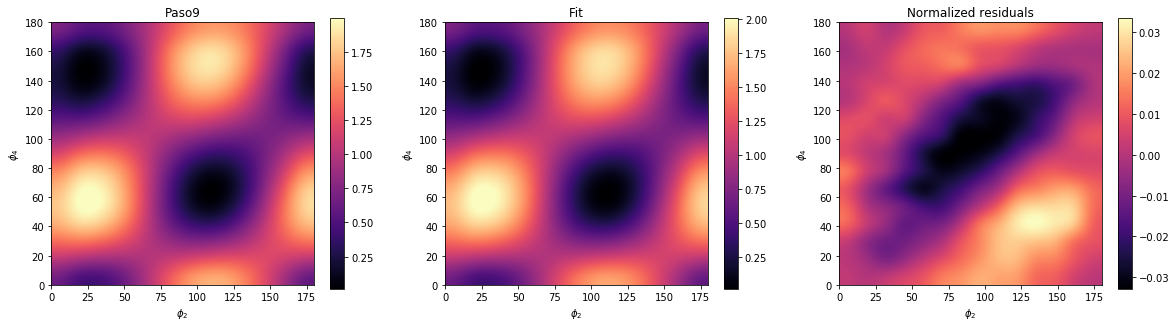

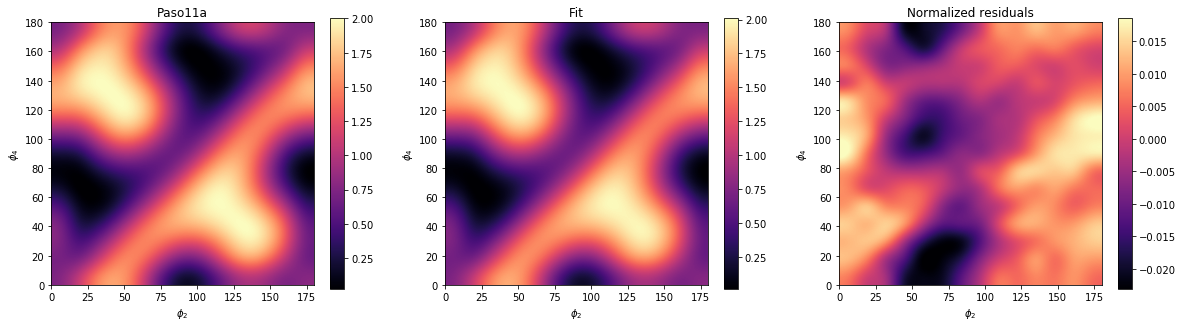

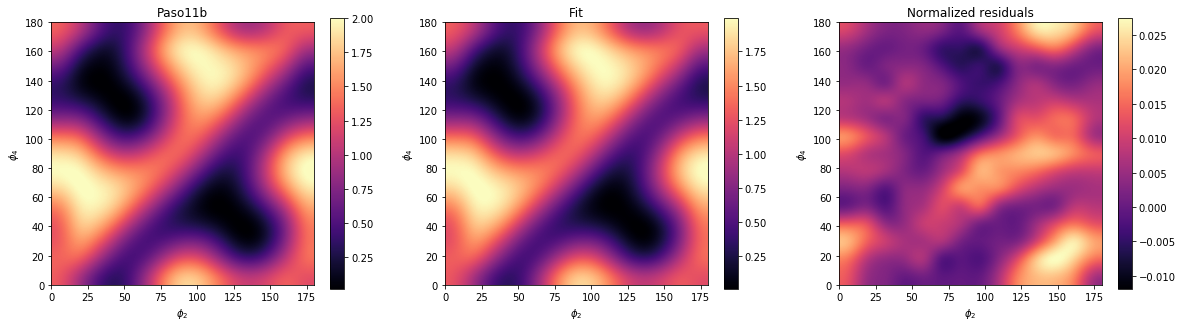

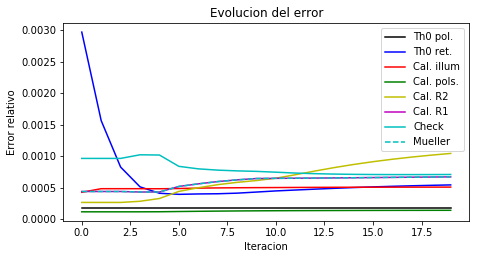

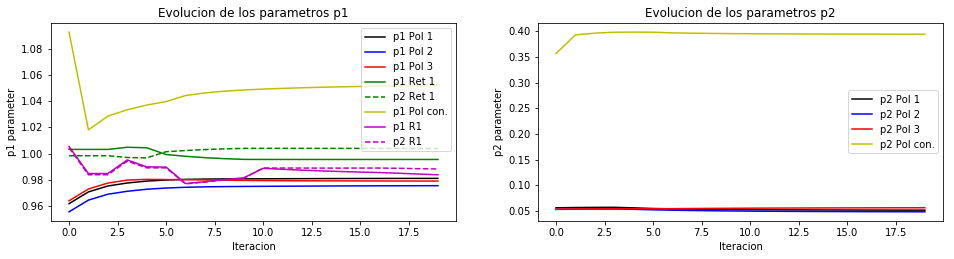

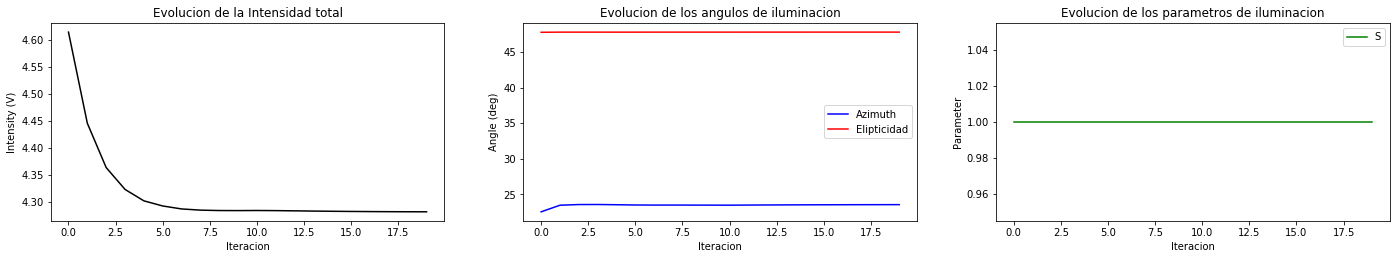

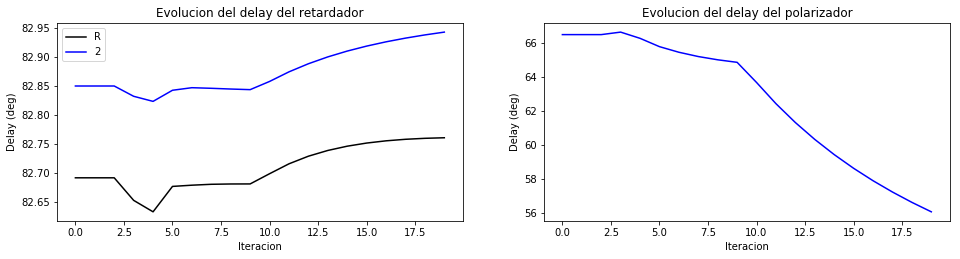

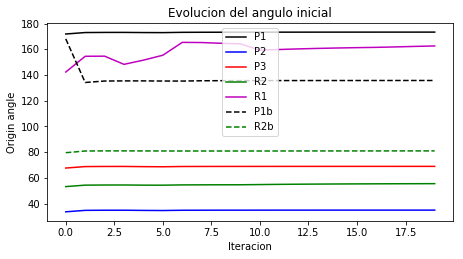

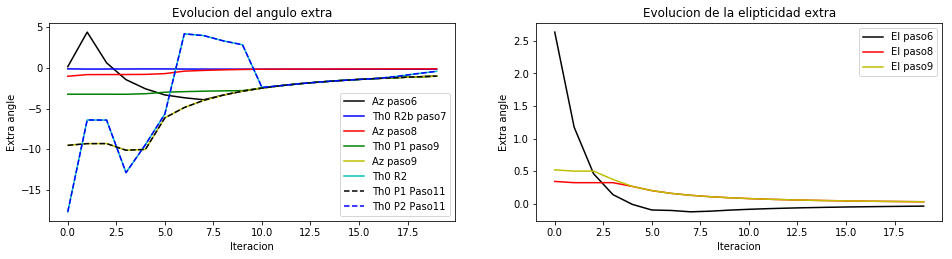

In [31]:
Process_Calibration(cal_dict)

## Final

Ahora vamos a copiar el script utilizado para realizar el ajuste, y este notebook. IMPORTANTE: Comprueba los nombres de archivo y localizaciones, no pueden guardarse en variables y hay que cambiarlo manualmente ahora. 

In [32]:
# Recordar fecha para nombre de archivos
fecha = datetime.date.today()
print(fecha)

2019-02-07


In [34]:
# Go to script folder
%cd process
# Copy the file
%copy $name_process $path_medidas_new
# Go to notebook folder
%cd medidas
# Copy the file
%copy $name_notebook $path_medidas_new

(bookmark:process) -> C:\Users\luismiguel\software\polarimeter\polarimeter
C:\Users\luismiguel\software\polarimeter\polarimeter
        1 archivo(s) copiado(s).
(bookmark:medidas) -> C:\Users\luismiguel\software\polarimeter\notebooks\calibration
C:\Users\luismiguel\software\polarimeter\notebooks\calibration
        1 archivo(s) copiado(s).


Finalmente, cerrar los motores.

In [36]:
# Cerrar motores
motors.close()
del motors
LabJackPython.Close()

NameError: name 'motors' is not defined